# Lead Scoring Case Study
### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.<br><br>
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.<br><br>
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.<br><br>
The company requires a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Reading and Understanding the data

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

In [2]:
leads = pd.read_csv(".\leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

Immediately, looking at the column level information, we can see that there are null values that need to be treated

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preparation and Visualization

#### Treating Null Values
Let's begin by checking the percentage of null values are present in each row, to get rid of rows that have a really large number of nulls

In [7]:
leads.isnull().sum(axis=1).value_counts().sort_index()

0     1943
1     1016
2      380
3      170
4     1588
5     1220
6      674
7      189
8      363
9      654
10     379
11      19
12     240
13     405
dtype: int64

We can see that a few rows have a really large number of nulls. Let's remove all the rows that have more than 10 rows as nulls

In [8]:
leads = leads.loc[leads.isnull().sum(axis=1)<=10,:]
leads.shape

(8576, 37)

Let's check the percentage of null values that need to be treated in each column

In [9]:
#Percentage of null values per column
round((leads.isnull().sum()+(leads[:] == 'Select').sum())/len(leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.41
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.57
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.57
Last Activity                                     1.19
Country                                          23.85
Specialization                                   31.79
How did you hear about X Education               76.80
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Search                                            0.00
Magazine                                          0.00
Newspaper 

As evident, we can see plenty of columns that have null values present. Before proceeding with the analysis, it is necessary to ensure these null values have been taken care of. Let's proceed by looking at 1 column at a time

**'Lead Source' Column**

In [10]:
# The Lead Source Column
print("count of null rows =",leads['Lead Source'].isnull().sum())
round(leads['Lead Source'].value_counts()/(len(leads)-leads['Lead Source'].isnull().sum())*100,2)

count of null rows = 35


Google               31.68
Direct Traffic       29.34
Olark Chat           15.77
Organic Search       12.91
Reference             6.25
Welingak Website      1.66
Referral Sites        1.45
Facebook              0.64
google                0.06
Click2call            0.05
bing                  0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
NC_EDM                0.01
testone               0.01
WeLearn               0.01
welearnblog_Home      0.01
blog                  0.01
Pay per Click Ads     0.01
Name: Lead Source, dtype: float64

We can see that there are only 35 missing values in the data. Along with the Lead Source column, there is another related column known as Lead Origin. Let's impute the Lead Source value in the column based on the maximum lead score within a Lead Origin

In [11]:
# Find the max Lead source within each Lead Origin group
temp_ls = pd.pivot_table(data=leads[['Lead Origin', 'Lead Source']].loc[~(leads['Lead Source']).isnull(),:], index='Lead Origin', values='Lead Source', aggfunc=np.max)
#temp_ls ['Lead Origin'] = temp_ls.index
#temp_ls[['Lead Origin', 'Lead Source']]
temp_ls

,Lead Source
Lead Origin,
API,bing
Landing Page Submission,welearnblog_Home
Lead Add Form,Welingak Website
Lead Import,Facebook


In [12]:
#Impute the missing values in the Lead Source column based on their corresponding Lead Origin value

leads.loc[((leads['Lead Source']).isnull()) & (leads['Lead Origin'] == 'API'),'Lead Source'] = 'bing'
leads.loc[((leads['Lead Source']).isnull()) & (leads['Lead Origin'] == 'Landing Page Submission'),'Lead Source'] = 'welearnblog_Home'
leads.loc[((leads['Lead Source']).isnull()) & (leads['Lead Origin'] == 'Lead Add Form'),'Lead Source'] = 'Welingak Website'
leads.loc[((leads['Lead Source']).isnull()) & (leads['Lead Origin'] == 'Lead Import'),'Lead Source'] = 'Facebook'

#Replace the remaining null value with the maximim Lead Source i.e. Google
leads.loc[(leads['Lead Source']).isnull(),'Lead Source'] = 'Google'

Let's look at the Lead Source column again to see if all the null values have been treated and what the distribution of the column looks like

In [13]:
# The Lead Source Column
print("count of null rows =",leads['Lead Source'].isnull().sum())
round(leads['Lead Source'].value_counts()/(len(leads)-leads['Lead Source'].isnull().sum())*100,2)

count of null rows = 0


Google               31.56
Direct Traffic       29.22
Olark Chat           15.71
Organic Search       12.86
Reference             6.23
Welingak Website      2.03
Referral Sites        1.45
Facebook              0.65
google                0.06
Click2call            0.05
bing                  0.03
Live Chat             0.02
welearnblog_Home      0.02
Press_Release         0.02
Social Media          0.02
NC_EDM                0.01
testone               0.01
WeLearn               0.01
blog                  0.01
Pay per Click Ads     0.01
Name: Lead Source, dtype: float64

**'Total Visits', 'Page Views Per Visit' Column**

In [14]:
#Checking the nulls in the column
print("count of null rows in TotalVisits =",leads['TotalVisits'].isnull().sum())
print("count of null rows in Page Views Per Visit =",leads['Page Views Per Visit'].isnull().sum())

count of null rows in TotalVisits = 135
count of null rows in Page Views Per Visit = 135


In [15]:
#Replace the values with the mean of the column
TotalVisitsMean = leads.loc[~leads['TotalVisits'].isnull(),'TotalVisits'].mean()
PageViewsPerVisitMean = leads.loc[~leads['Page Views Per Visit'].isnull(),'Page Views Per Visit'].mean()


leads.loc[leads['TotalVisits'].isnull(),'TotalVisits'] = TotalVisitsMean
leads.loc[leads['Page Views Per Visit'].isnull(),'Page Views Per Visit'] = PageViewsPerVisitMean

In [16]:
#Checking the nulls in the column
print("count of null rows in TotalVisits =",leads['TotalVisits'].isnull().sum())
print("count of null rows in Page Views Per Visit =",leads['Page Views Per Visit'].isnull().sum())

count of null rows in TotalVisits = 0
count of null rows in Page Views Per Visit = 0


**'Last Activity' Column**

In [17]:
#Checking the nulls in the column
print("count of null rows in LastActivity =",leads['Last Activity'].isnull().sum())

count of null rows in LastActivity = 102


In [18]:
leads.loc[~leads['Last Activity'].isnull(),'Last Activity'].value_counts()

Email Opened                    3244
SMS Sent                        2631
Olark Chat Conversation          754
Page Visited on Website          595
Converted to Lead                389
Email Bounced                    302
Email Link Clicked               247
Form Submitted on Website        115
Unreachable                       91
Unsubscribed                      56
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [19]:
# Considering we're not sure of what the values of the Last Activity should be, we can classify these values as 'Unreachable'
leads.loc[leads['Last Activity'].isnull(),'Last Activity'] = 'Unreachable'

In [20]:
#Checking the nulls in the column
print("count of null rows in LastActivity =",leads['Last Activity'].isnull().sum())

count of null rows in LastActivity = 0


**'Country' Column**

In [21]:
#Checking the nulls in the column
print("count of null rows in Country =",leads['Country'].isnull().sum())

count of null rows in Country = 2045


In [22]:
round(leads['Country'].value_counts()/(len(leads)),2).head(10)

India                   0.73
United States           0.01
United Arab Emirates    0.01
Singapore               0.00
Saudi Arabia            0.00
United Kingdom          0.00
Australia               0.00
Qatar                   0.00
Bahrain                 0.00
Hong Kong               0.00
Name: Country, dtype: float64

Looking at the above data in the Country column, we can see over 73% of the data has country as India, and close to 23% of the data in the column is missing. Therefore, we can go ahead and drop this column as it doesn't introduce any major variance in our data

In [23]:
leads=leads.drop(columns=['Country'])

In [24]:
leads.shape

(8576, 36)

**'Specialization' Column**

In [25]:
#Checking the nulls in the column
print("count of null rows in Specialization =",leads['Specialization'].isnull().sum()+(leads['Specialization']=='Select').sum())

count of null rows in Specialization = 2726


In [26]:
round(leads['Specialization'].value_counts()/(len(leads)-leads['Specialization'].isnull().sum())*100,2)

Select                               24.90
Finance Management                   12.50
Human Resource Management            10.87
Marketing Management                 10.74
Operations Management                 6.43
Business Administration               5.16
IT Projects Management                4.69
Supply Chain Management               4.48
Banking, Investment And Insurance     4.33
Media and Advertising                 2.61
Travel and Tourism                    2.61
International Business                2.28
Healthcare Management                 2.04
Hospitality Management                1.46
E-COMMERCE                            1.44
Retail Management                     1.28
Rural and Agribusiness                0.94
E-Business                            0.72
Services Excellence                   0.51
Name: Specialization, dtype: float64

Considering that the leads with missing values and 'Select' values in the country column come up to above over 30%, these rows cannot be dropped. Also, imputation of such a high order may lead to massive bias in the existing column. Therefore, let us convert all these data points into another specialization category known as 'Unknown'

In [27]:
leads.loc[(leads['Specialization'].isnull()) | (leads['Specialization']=='Select'),'Specialization'] = 'Unknown'

In [28]:
#Checking the nulls in the column
print("count of null rows in Specialization =",leads['Specialization'].isnull().sum()+(leads['Specialization']=='Select').sum())

count of null rows in Specialization = 0


**'How did you hear about X Education' Column**

In [29]:
#Checking the nulls in the column
print("count of null rows in 'How did you hear about X' =",leads['How did you hear about X Education'].isnull().sum()+(leads['How did you hear about X Education']=='Select').sum())

count of null rows in 'How did you hear about X' = 6586


We observe that close to 76% of the entire column data is either null or 'Select'. We can therefore go ahead and drop this column

In [30]:
leads = leads.drop(columns='How did you hear about X Education')

In [31]:
leads.shape

(8576, 35)

**'What is your current occupation' Column**

In [32]:
#Checking the nulls in the column
print("count of null rows in 'What is your current occupation' =",leads['What is your current occupation'].isnull().sum()+(leads['What is your current occupation']=='Select').sum())

count of null rows in 'What is your current occupation' = 2027


In [33]:
round(leads['What is your current occupation'].value_counts()/(len(leads))*100,2)

Unemployed              65.29
Working Professional     8.23
Student                  2.45
Other                    0.19
Housewife                0.12
Businessman              0.09
Name: What is your current occupation, dtype: float64

With close to 65% of the leads as unemployed and close to 23% of the majority of the data in the column is not explaining any variance. We can go ahead and drop the column

In [34]:
leads = leads.drop(columns='What is your current occupation')

In [35]:
leads.shape

(8576, 34)

**'What matters most to you in choosing a course' Column**

In [36]:
#Checking the nulls in the column
print("count of null rows in 'What matters most to you in choosing a course' =",leads['What matters most to you in choosing a course'].isnull().sum()+(leads['What matters most to you in choosing a course']=='Select').sum())

count of null rows in 'What matters most to you in choosing a course' = 2046


In [37]:
round(leads['What matters most to you in choosing a course'].value_counts()/(len(leads))*100,2)

Better Career Prospects      76.11
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

Majority of the users opted for 'Better Career Prospects' for this column. Considering there is minimal variance explained by this variable, we can drop this variable

In [38]:
leads = leads.drop(columns='What matters most to you in choosing a course')

In [39]:
leads.shape

(8576, 33)

**'Tags' Column**

In [40]:
#Checking the nulls in the column
print("count of null rows in 'Tags' =",leads['Tags'].isnull().sum()+(leads['Tags']=='Select').sum())

count of null rows in 'Tags' = 2696


In [41]:
round(leads['Tags'].value_counts()/(len(leads))*100,2)

Will revert after reading the email                  24.16
Ringing                                              14.03
Interested in other courses                           5.94
Already a student                                     5.42
Closed by Horizzon                                    4.17
switched off                                          2.80
Busy                                                  2.17
Lost to EINS                                          2.01
Not doing further education                           1.69
Interested  in full time MBA                          1.36
Graduation in progress                                1.29
invalid number                                        0.97
Diploma holder (Not Eligible)                         0.73
wrong number given                                    0.55
opp hangup                                            0.38
number not provided                                   0.31
in touch with EINS                                    0.

We have over 30% of null values in the column, imputing these values would mean that we'll be increasing the bias in the column, hence we can go ahead and drop the column

In [42]:
leads = leads.drop(columns=['Tags'])

In [43]:
leads.shape

(8576, 32)

**'Lead Quality' Column**

In [44]:
#Checking the nulls in the column
print("count of null rows in 'Lead Quality' =",leads['Lead Quality'].isnull().sum()+(leads['Lead Quality']=='Select').sum())

count of null rows in 'Lead Quality' = 4103


We have close to 50% of values as null in the Lead Quality column. The column can therefore be dropped

In [45]:
leads = leads.drop(columns='Lead Quality')

In [46]:
leads.shape

(8576, 31)

**'Lead Profile' Column** 

In [47]:
#Checking the nulls in the column
print("count of null rows in 'Lead Profile' =",leads['Lead Profile'].isnull().sum()+(leads['Lead Profile']=='Select').sum())

count of null rows in 'Lead Profile' = 6191


We have over 72% of values missing in the column. Therfore, this column can be ignored for our analysis

In [48]:
leads = leads.drop(columns='Lead Profile')

In [49]:
leads.shape

(8576, 30)

**'City' Column**

In [50]:
#Checking the nulls in the column
print("null rows in 'City' =",(leads['City'].isnull().sum()+(leads['City']=='Select').sum())/len(leads)*100)

null rows in 'City' = 35.13292910447761


 Since we have over 35% missing values in the city column, we can go ahead and drop it

In [51]:
leads = leads.drop(columns='City')

In [52]:
leads.shape

(8576, 29)

**'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' Columns**

In [53]:
#Checking the nulls in the column
print("null rows in 'Asymmetrique Activity Index' =",(leads['Asymmetrique Activity Index'].isnull().sum()+(leads['Asymmetrique Activity Index']=='Select').sum())/len(leads)*100)

null rows in 'Asymmetrique Activity Index' = 41.45289179104478


All the columns, as seen previously, have over 40% of missing values. We can therefore go ahead and drop these columns

In [54]:
leads = leads.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [55]:
leads.shape

(8576, 25)

We can also go ahead and drop the **Prospect ID** column as this is not explaining the data, but just acting as an identifier for the lead. We will include the **Lead Number** column and use that as the identifier between our actual data points and predicted data points

In [56]:
leads = leads.drop(columns=['Prospect ID'])

Now that we have individually looked at every column, let's see if we have treated all the missing values

In [57]:
#Percentage of null values per column
round((leads.isnull().sum()+(leads[:] == 'Select').sum())/len(leads)*100,2)

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [58]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Exploratory Data Analysis

Now that we have an exhaustive list of columns (that have been cleaned and are model ready), let's **visualize the relationship that each one of them demonstrates with our dependent variable**. This will be done separately for numerical and categorical variables - hence for a first step, let's separate these two out.

In [59]:
cat_var = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'Search', 'Magazine', 'Newspaper Article',
           'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
           'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
           'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

y_var = ['Converted']


For all the categorical values, let's have a look at how many levels exist within each of them

In [60]:
for i in range (len(cat_var)):
    print(leads[cat_var[i]].value_counts())

Landing Page Submission    4858
API                        2945
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2707
Direct Traffic       2506
Olark Chat           1347
Organic Search       1103
Reference             534
Welingak Website      174
Referral Sites        124
Facebook               56
google                  5
Click2call              4
bing                    3
Live Chat               2
welearnblog_Home        2
Press_Release           2
Social Media            2
NC_EDM                  1
testone                 1
WeLearn                 1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
No     7896
Yes     680
Name: Do Not Email, dtype: int64
No     8574
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3244
SMS Sent                        2631
Olark Chat Conversation          754
Page Visited on Website         

Looking at the above split of levels in the columns, we see that there is a **significant variable imbalance** in the following columns: Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque

In [61]:
leads = leads.drop(columns=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                   'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
                   'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])

In [62]:
leads.shape

(8576, 12)

In [63]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown,No,Modified


In [64]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [65]:
cat_var = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization',
           'A free copy of Mastering The Interview', 'Last Notable Activity']

num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

y_var = ['Converted']


#### Visualizing the numerical variables as a pairplot

<Figure size 720x720 with 0 Axes>

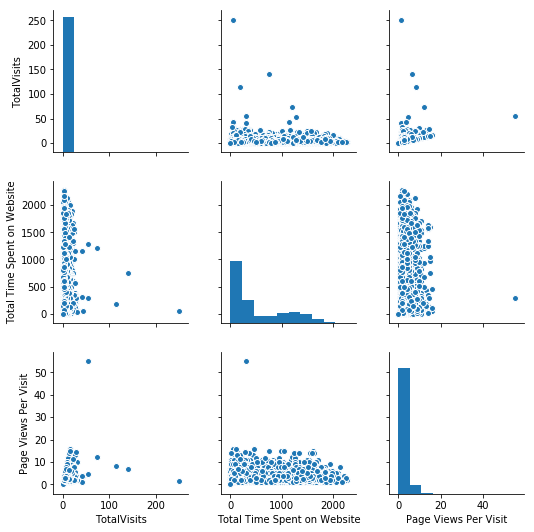

In [66]:
# Since the number of numerical variables are plenty, we'll go about visualizing them in parts
plt.figure(figsize=(10,10))
sns.pairplot(leads[num_var])
plt.show()

#### Outlier treatment for the numerical variables

Let's plot individual boxplots for each of the numerical variables to see their distribution and identify any outliers in the data

Text(0.5,1,'Page Views Per Visit')

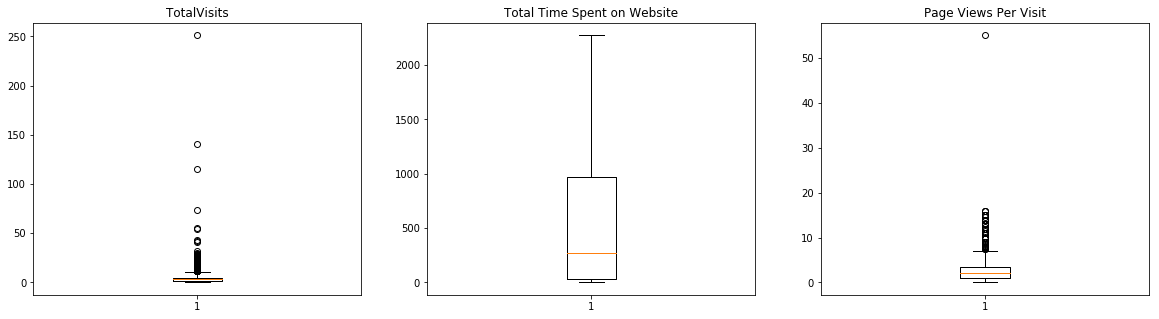

In [67]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.boxplot(leads['TotalVisits'])
plt.title('TotalVisits')

plt.subplot(1,3,2)
plt.boxplot(leads['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
plt.boxplot(leads['Page Views Per Visit'])
plt.title('Page Views Per Visit')

There clearly exist outlier values in these columns, let's get rid of them - removing all the rows where the Total Visits column value and the Page Views Per Visit values is above the 95th percentile of their respective distribution

In [68]:
outlier_index = leads.loc[(leads['Page Views Per Visit']>leads['Page Views Per Visit'].quantile(0.95))&
                          (leads['TotalVisits']>leads['TotalVisits'].quantile(0.95)) | (leads['TotalVisits']>20),:].index
leads = leads.drop(outlier_index)

#### Let's visualize the categorical variables

Usineg **univariate analysis**, **bivariate analysis** and **segmented univariate analysis** to understand what levels within each categorical variables are contributing to the most number of lead conversions

In [69]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown,No,Modified


Looking at the different types of **Lead Origin's** contributing to conversions

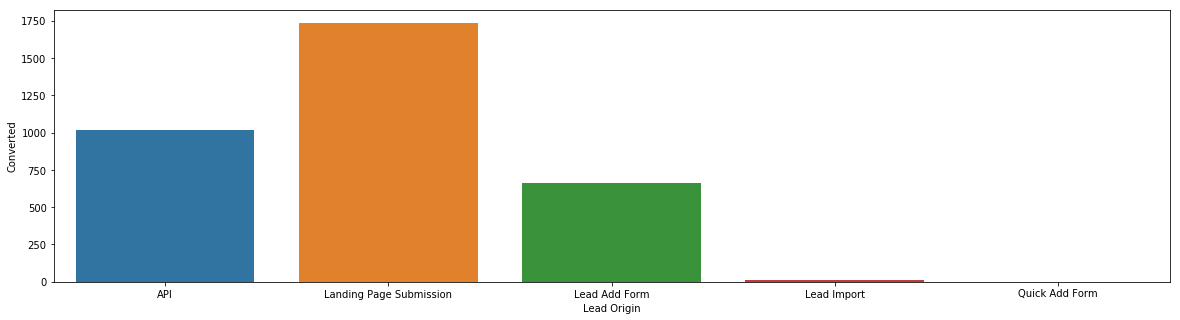

In [70]:
by_leadorigin = pd.DataFrame(leads.groupby('Lead Origin')['Converted'].sum())
by_leadorigin['Lead Origin'] = by_leadorigin.index

plt.figure(figsize=(20,5))
sns.barplot(x=by_leadorigin['Lead Origin'], y=by_leadorigin['Converted'])

We can see that majority of the users convert who have 'Landing Page Submission' as the Origin of the lead

Looking at the **Last Activity** post which we see majority of conversions

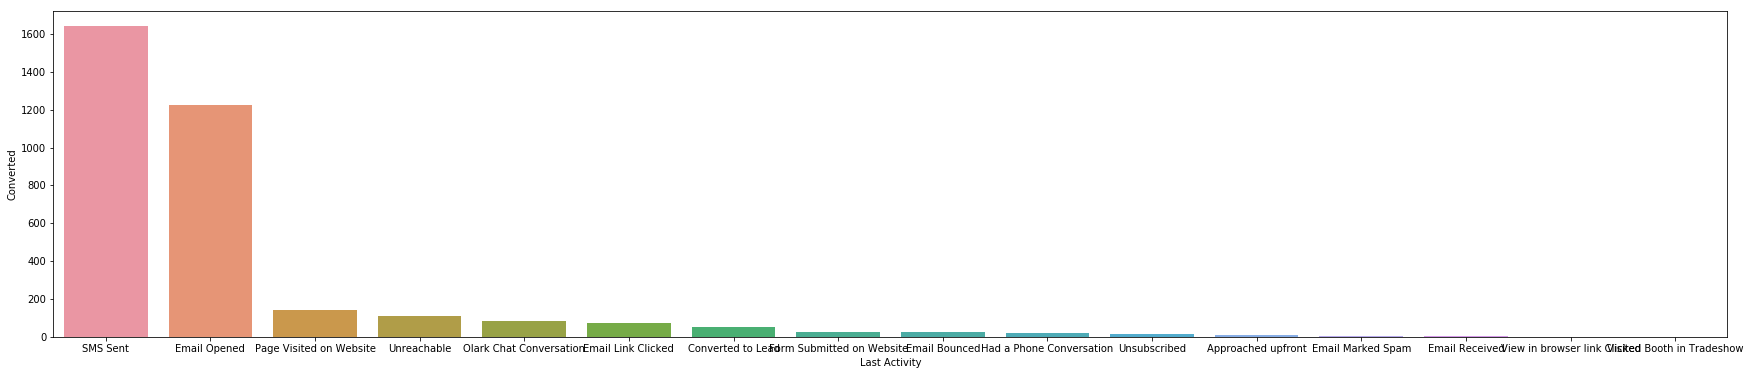

In [71]:
by_lastact = pd.DataFrame(leads.groupby('Last Activity')['Converted'].sum()).sort_values(by = 'Converted', ascending = False)
by_lastact['Last Activity'] = by_lastact.index

plt.figure(figsize=(30,6))
sns.barplot(x=by_lastact['Last Activity'], y=by_lastact['Converted'])

We can see that majority of the users whose last activity was 'SMS Sent' or 'Email Opened' are most likely to convert

Looking at the **Specialization** of the users that had the most conversions

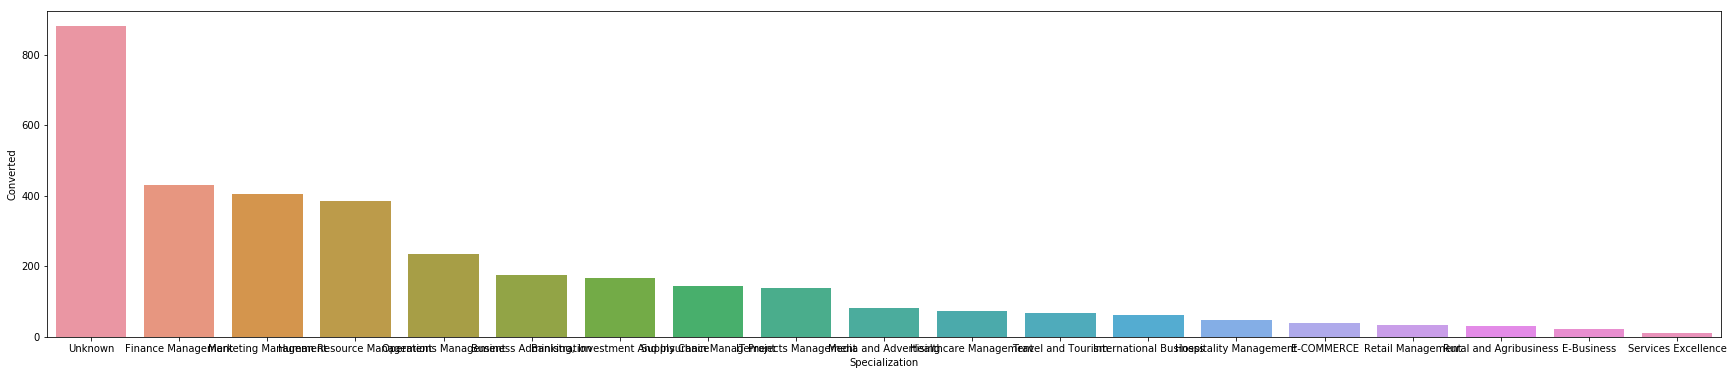

In [72]:
by_spec = pd.DataFrame(leads.groupby('Specialization')['Converted'].sum()).sort_values(by = 'Converted', ascending = False)
by_spec['Specialization'] = by_spec.index

plt.figure(figsize=(30,6))
sns.barplot(x=by_spec['Specialization'], y=by_spec['Converted'])

We can see that majotiy of the users that convert fall in the unknown category. Considering this category is one that was imputed, it consists of nulls and 'select'. We can go ahead and **drop** this column from the dataset

In [73]:
leads = leads.drop (columns='Specialization')

Let's perform **segmented univariate analysis** to understand what 'Lead Origin' values within the 'Do Not Email' variable contribute most to conversions

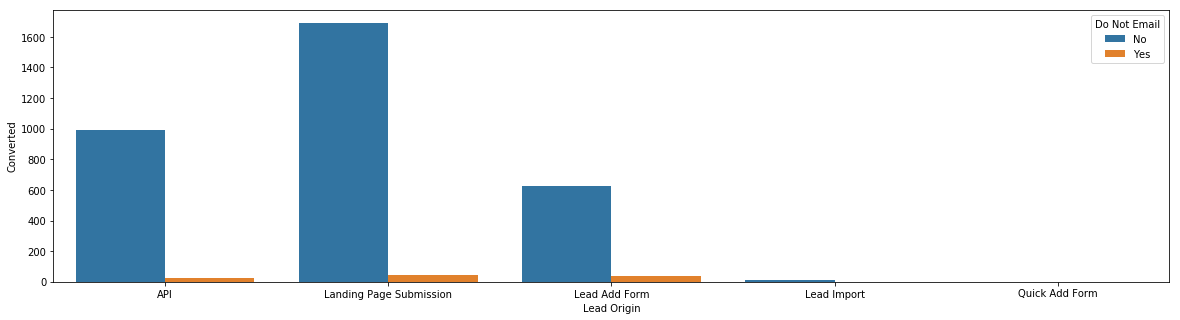

In [74]:
plt.figure(figsize=(20,5))
sns.barplot(x='Lead Origin',y= "Converted", hue = "Do Not Email", estimator=lambda y: sum(y), data=leads, ci=None)

Now that we have identified what sort of trend the data seems to be following, and treated outliers, let's go ahead with **treating categorical variables**

#### Encoding Categorical Variables

In [75]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [76]:
# List of variables to map
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [77]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [78]:
# The Lead Origin variable
leadorigin_levels = pd.get_dummies(leads['Lead Origin'])
leadorigin_levels.columns = ['leadorigin_API', 'leadorigin_LandingPageSubmission', 'leadorigin_LeadAddForm','leadorigin_LeadImport', 'leadorigin_QuickAddForm']
leads = pd.concat([leads, leadorigin_levels], axis = 1)

In [79]:
# The Lead Source variable
leadsource_levels = pd.get_dummies(leads['Lead Source'])
leadsource_levels.columns = ['leadsource_Click2call', 'leadsource_DirectTraffic', 'leadsource_Facebook', 'leadsource_Google',
                             'leadsource_LiveChat', 'leadsource_NC_EDM', 'leadsource_OlarkChat', 'leadsource_OrganicSearch',
                             'leadsource_PayPerClickAds', 'leadsource_Press_Release', 'leadsource_Reference', 
                             'leadsource_ReferralSites', 'leadsource_SocialMedia', 'leadsource_WeLearn', 
                             'leadsource_WelingakWebsite', 'leadsource_bing', 'leadsource_blog', 'leadsource_google', 
                             'leadsource_testone', 'leadsource_welearnblog_Home']

leads = pd.concat([leads, leadsource_levels], axis = 1)

In [80]:
# The Last Activity variable
lastactivity_levels = pd.get_dummies(leads['Last Activity'])
lastactivity_levels.columns = ['lastactivity_ApproachedUpfront', 'lastactivity_Converted2Lead', 'lastactivity_EmailBounced',
                               'lastactivity_EmailLinkClicked', 'lastactivity_EmailMarkedSpam', 'lastactivity_EmailOpened',
                               'lastactivity_EmailRec', 'lastactivity_FormSubmitted', 'lastactivity_Phone_Conversation', 
                               'lastactivity_OlarkChatConversation', 'lastactivity_PageVisited', 'lastactivity_SMSSent',
                               'lastactivity_Unreachable', 'lastactivity_Unsubscribed', 'lastactivity_ViewlinkClicked',
                               'lastactivity_VisitedBoothTradeshow']
leads = pd.concat([leads, lastactivity_levels], axis = 1)

In [81]:
# The Last Activity variable
lastnotable_levels = pd.get_dummies(leads['Last Notable Activity'])
lastnotable_levels.columns = ['lastnotable_ApproachedUpfront', 'lastnotable_EmailBounced', 'lastnotable_EmailLinkClicked',
                              'lastnotable_EmailMarkedSpam', 'lastnotable_EmailOpened', 'lastnotable_EmailReceived',
                              'lastnotable_FormSubmittedWebsite', 'lastnotable_PhoneConversation', 'lastnotable_Modified',
                              'lastnotable_OlarkChatConv', 'lastnotable_PageVisitedWebsite', 'lastnotable_SMSSent',
                              'lastnotable_Unreachable', 'lastnotable_Unsubscribed', 'lastnotable_ViewBrowserLinkClicked']
leads = pd.concat([leads, lastnotable_levels], axis = 1)

Let's drop the original categorical variables now that we have the dummy variables for the respective levels

In [82]:
leads = leads.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'])

In [83]:
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,leadorigin_API,leadorigin_LandingPageSubmission,leadorigin_LeadAddForm,...,lastnotable_EmailReceived,lastnotable_FormSubmittedWebsite,lastnotable_PhoneConversation,lastnotable_Modified,lastnotable_OlarkChatConv,lastnotable_PageVisitedWebsite,lastnotable_SMSSent,lastnotable_Unreachable,lastnotable_Unsubscribed,lastnotable_ViewBrowserLinkClicked
0,660737,0,0,0.0,0,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


**Let's drop all the columns where the dummy variable is showing massive variable imbalance**

In [84]:
dummy_vars = ['leadorigin_API',
       'leadorigin_LandingPageSubmission', 'leadorigin_LeadAddForm',
       'leadorigin_LeadImport', 'leadorigin_QuickAddForm',
       'leadsource_Click2call', 'leadsource_DirectTraffic',
       'leadsource_Facebook', 'leadsource_Google', 'leadsource_LiveChat',
       'leadsource_NC_EDM', 'leadsource_OlarkChat', 'leadsource_OrganicSearch',
       'leadsource_PayPerClickAds', 'leadsource_Press_Release',
       'leadsource_Reference', 'leadsource_ReferralSites',
       'leadsource_SocialMedia', 'leadsource_WeLearn',
       'leadsource_WelingakWebsite', 'leadsource_bing', 'leadsource_blog',
       'leadsource_google', 'leadsource_testone',
       'leadsource_welearnblog_Home',
       'lastactivity_ApproachedUpfront', 'lastactivity_Converted2Lead',
       'lastactivity_EmailBounced', 'lastactivity_EmailLinkClicked',
       'lastactivity_EmailMarkedSpam', 'lastactivity_EmailOpened',
       'lastactivity_EmailRec', 'lastactivity_FormSubmitted',
       'lastactivity_Phone_Conversation', 'lastactivity_OlarkChatConversation',
       'lastactivity_PageVisited', 'lastactivity_SMSSent',
       'lastactivity_Unreachable', 'lastactivity_Unsubscribed',
       'lastactivity_ViewlinkClicked', 'lastactivity_VisitedBoothTradeshow',
       'lastnotable_ApproachedUpfront', 'lastnotable_EmailBounced',
       'lastnotable_EmailLinkClicked', 'lastnotable_EmailMarkedSpam',
       'lastnotable_EmailOpened', 'lastnotable_EmailReceived',
       'lastnotable_FormSubmittedWebsite', 'lastnotable_PhoneConversation',
       'lastnotable_Modified', 'lastnotable_OlarkChatConv',
       'lastnotable_PageVisitedWebsite', 'lastnotable_SMSSent',
       'lastnotable_Unreachable', 'lastnotable_Unsubscribed',
       'lastnotable_ViewBrowserLinkClicked']

In [85]:
for i in range (len(dummy_vars)):
    print(leads[dummy_vars[i]].value_counts())

0    5540
1    2919
Name: leadorigin_API, dtype: int64
1    4768
0    3691
Name: leadorigin_LandingPageSubmission, dtype: int64
0    7743
1     716
Name: leadorigin_LeadAddForm, dtype: int64
0    8404
1      55
Name: leadorigin_LeadImport, dtype: int64
0    8458
1       1
Name: leadorigin_QuickAddForm, dtype: int64
0    8455
1       4
Name: leadsource_Click2call, dtype: int64
0    5980
1    2479
Name: leadsource_DirectTraffic, dtype: int64
0    8403
1      56
Name: leadsource_Facebook, dtype: int64
0    5774
1    2685
Name: leadsource_Google, dtype: int64
0    8457
1       2
Name: leadsource_LiveChat, dtype: int64
0    8458
1       1
Name: leadsource_NC_EDM, dtype: int64
0    7113
1    1346
Name: leadsource_OlarkChat, dtype: int64
0    7412
1    1047
Name: leadsource_OrganicSearch, dtype: int64
0    8458
1       1
Name: leadsource_PayPerClickAds, dtype: int64
0    8458
1       1
Name: leadsource_Press_Release, dtype: int64
0    7926
1     533
Name: leadsource_Reference, dtype: int64
0 

In [86]:
leads = leads.drop(columns=['leadorigin_QuickAddForm', 'leadsource_Click2call', 'leadsource_LiveChat', 'leadsource_NC_EDM',
                            'leadsource_PayPerClickAds', 'leadsource_Press_Release', 'leadsource_SocialMedia', 
                            'leadsource_WeLearn', 'leadsource_bing', 'leadsource_blog', 'leadsource_google', 
                            'leadsource_testone', 'leadsource_welearnblog_Home',
                            'lastactivity_ApproachedUpfront', 'lastactivity_EmailMarkedSpam', 'lastactivity_EmailRec',
                            'lastactivity_Phone_Conversation','lastactivity_ViewlinkClicked',
                            'lastactivity_VisitedBoothTradeshow', 'lastnotable_ApproachedUpfront', 'lastnotable_EmailMarkedSpam',
                            'lastnotable_EmailReceived', 'lastnotable_FormSubmittedWebsite', 'lastnotable_PhoneConversation',
                            'lastnotable_Unreachable', 'lastnotable_Unsubscribed', 'lastnotable_ViewBrowserLinkClicked'])

In [87]:
leads.columns
#Columns with duplicate names because of similar dummy variable names causing problems, need to be resolved

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'leadorigin_API',
       'leadorigin_LandingPageSubmission', 'leadorigin_LeadAddForm',
       'leadorigin_LeadImport', 'leadsource_DirectTraffic',
       'leadsource_Facebook', 'leadsource_Google', 'leadsource_OlarkChat',
       'leadsource_OrganicSearch', 'leadsource_Reference',
       'leadsource_ReferralSites', 'leadsource_WelingakWebsite',
       'lastactivity_Converted2Lead', 'lastactivity_EmailBounced',
       'lastactivity_EmailLinkClicked', 'lastactivity_EmailOpened',
       'lastactivity_FormSubmitted', 'lastactivity_OlarkChatConversation',
       'lastactivity_PageVisited', 'lastactivity_SMSSent',
       'lastactivity_Unreachable', 'lastactivity_Unsubscribed',
       'lastnotable_EmailBounced', 'lastnotable_EmailLinkClicked',
       'lastnotable_EmailOpened', 'lastnotable_Modified',
       'lastnotable

Now that we're done with the data preparation and visualization - where we've ensured that we dont have any missing values in the data, the outliers have been treated, the categorical variables have been encoded, and the irrelevant variables gotten rid of, we can proceed with our modelling

### Test-Train Split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,leadorigin_API,leadorigin_LandingPageSubmission,leadorigin_LeadAddForm,leadorigin_LeadImport,...,lastactivity_SMSSent,lastactivity_Unreachable,lastactivity_Unsubscribed,lastnotable_EmailBounced,lastnotable_EmailLinkClicked,lastnotable_EmailOpened,lastnotable_Modified,lastnotable_OlarkChatConv,lastnotable_PageVisitedWebsite,lastnotable_SMSSent
0,660737,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,660728,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,660727,0,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,660681,0,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [90]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
#Using minmax scaler to bring the data between 0 and 1
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy variables variables
X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

C:\Users\vyom\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\vyom\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,leadorigin_API,leadorigin_LandingPageSubmission,leadorigin_LeadAddForm,leadorigin_LeadImport,...,lastactivity_SMSSent,lastactivity_Unreachable,lastactivity_Unsubscribed,lastnotable_EmailBounced,lastnotable_EmailLinkClicked,lastnotable_EmailOpened,lastnotable_Modified,lastnotable_OlarkChatConv,lastnotable_PageVisitedWebsite,lastnotable_SMSSent
3296,628462,0,0.40,0.571682,0.8,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6487,600123,1,0.10,0.106081,0.2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4509,616460,1,0.25,0.269862,0.5,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
682,653525,0,0.10,0.713271,0.2,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3534,626664,0,0.15,0.057257,0.3,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [94]:
X_train.describe()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,leadorigin_API,leadorigin_LandingPageSubmission,leadorigin_LeadAddForm,leadorigin_LeadImport,...,lastactivity_SMSSent,lastactivity_Unreachable,lastactivity_Unsubscribed,lastnotable_EmailBounced,lastnotable_EmailLinkClicked,lastnotable_EmailOpened,lastnotable_Modified,lastnotable_OlarkChatConv,lastnotable_PageVisitedWebsite,lastnotable_SMSSent
count,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,...,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000,5921.000000
mean,617372.416146,0.078365,0.167149,0.228143,0.239053,0.332207,0.346563,0.564432,0.083094,0.005742,...,0.308563,0.022631,0.006249,0.008445,0.018578,0.310252,0.358385,0.016045,0.031920,0.245567
std,23987.717060,0.268768,0.149038,0.246106,0.189849,0.471045,0.475915,0.495873,0.276048,0.075566,...,0.461939,0.148738,0.078810,0.091513,0.135040,0.462636,0.479567,0.125658,0.175803,0.430459
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,595564.000000,0.000000,0.050000,0.015535,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615643.000000,0.000000,0.150000,0.120284,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,639054.000000,0.000000,0.250000,0.435419,0.333000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, all the values have now been scaled between 0 and 1

### Looking at Correlations

In [95]:
# All columns excluding the identifier column - Lead Number
all_columns = ['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'leadorigin_API',
       'leadorigin_LandingPageSubmission', 'leadorigin_LeadAddForm',
       'leadorigin_LeadImport', 'leadsource_DirectTraffic',
       'leadsource_Facebook', 'leadsource_Google', 'leadsource_OlarkChat',
       'leadsource_OrganicSearch', 'leadsource_Reference',
       'leadsource_ReferralSites', 'leadsource_WelingakWebsite',
       'lastactivity_Converted2Lead', 'lastactivity_EmailBounced',
       'lastactivity_EmailLinkClicked', 'lastactivity_EmailOpened',
       'lastactivity_FormSubmitted', 'lastactivity_OlarkChatConversation',
       'lastactivity_PageVisited', 'lastactivity_SMSSent',
       'lastactivity_Unreachable', 'lastactivity_Unsubscribed',
       'lastnotable_EmailBounced', 'lastnotable_EmailLinkClicked',
       'lastnotable_EmailOpened', 'lastnotable_Modified',
       'lastnotable_OlarkChatConv', 'lastnotable_PageVisitedWebsite',
       'lastnotable_SMSSent']

In [96]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

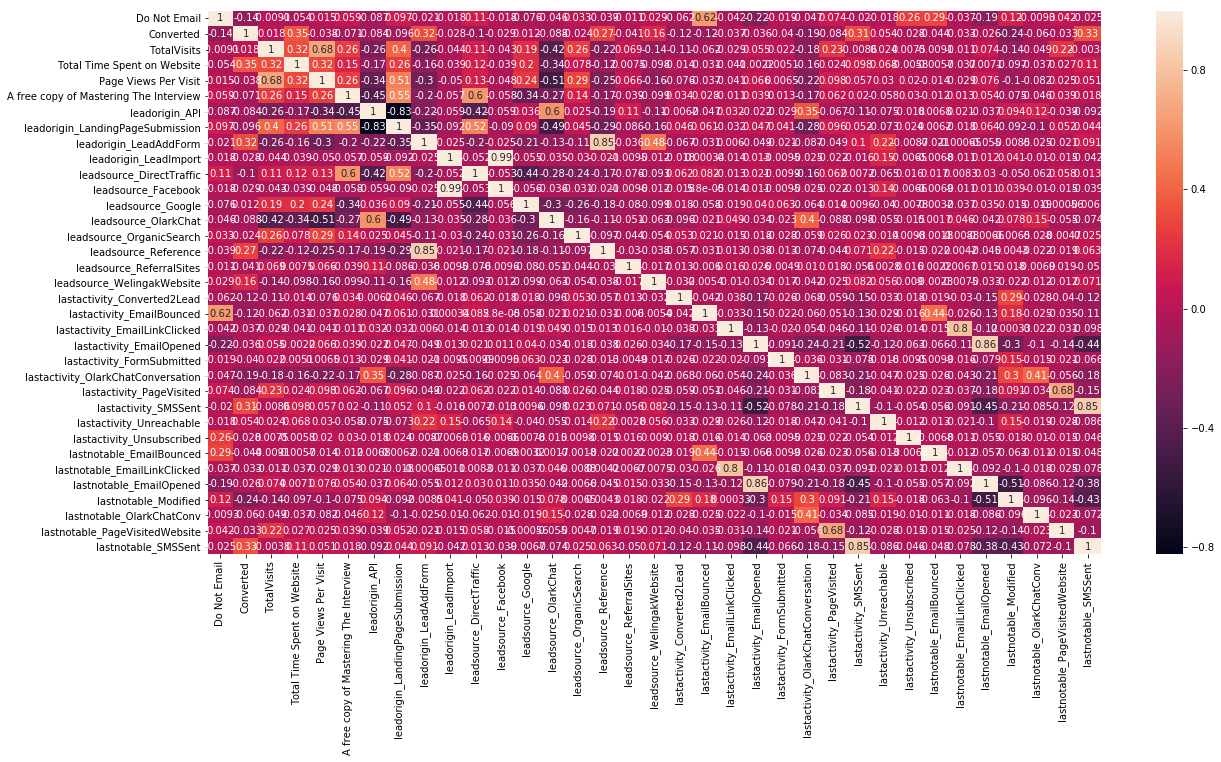

In [97]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads[all_columns].corr(),annot = True)
plt.show()

Considering the number of variables are so many, let's go ahead with model building to eliminate the most insignificant variables

### Model Building

Let's run our very first logistic regression model using statsmodels.api

In [98]:
# All columns excluding the identifier column and the converted column
all_x_columns = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
                 'A free copy of Mastering The Interview', 'leadorigin_API', 'leadorigin_LandingPageSubmission',
                 'leadorigin_LeadAddForm', 'leadorigin_LeadImport', 'leadsource_DirectTraffic', 'leadsource_Facebook',
                 'leadsource_Google', 'leadsource_OlarkChat', 'leadsource_OrganicSearch', 'leadsource_Reference',
                 'leadsource_ReferralSites', 'leadsource_WelingakWebsite', 'lastactivity_Converted2Lead',
                 'lastactivity_EmailBounced', 'lastactivity_EmailLinkClicked', 'lastactivity_EmailOpened',
                 'lastactivity_FormSubmitted', 'lastactivity_OlarkChatConversation', 'lastactivity_PageVisited',
                 'lastactivity_SMSSent', 'lastactivity_Unreachable', 'lastactivity_Unsubscribed',
                 'lastnotable_EmailBounced', 'lastnotable_EmailLinkClicked', 'lastnotable_EmailOpened', 'lastnotable_Modified',
                 'lastnotable_OlarkChatConv', 'lastnotable_PageVisitedWebsite', 'lastnotable_SMSSent']

In [99]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[all_x_columns])), family = sm.families.Binomial())

In [100]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5886
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.3
Date:                Mon, 10 Jun 2019   Deviance:                       5420.7
Time:                        22:59:03   Pearson chi2:                 6.06e+03
No. Iterations:                    19   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     21.7762   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Do Not Email                              -1.2177      0.208     -5.849      0.000      -1.626      -0.810
TotalVisits                                1.4342      0.325      4.417      0.000       0.798       2.071
Total Time Spent on Website                4.4027      0.161     27.356      0.000       4.087       4.718
Page Views Per Visit                      -0.8537      0.277     -3.080      0.002      -1.397      -0.310
A free copy of Mastering The Interview    -0.0484      0.103     -0.469      0.639      -0.251       0.154
leadorigin_API                           -20.4811   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
leadorigin_LandingPageSubmission         -20.6910   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
leadorigin_LeadAddForm                   -18.3952   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
leadorigin_LeadImport                      0.4480   2.51e+04   1.79e-05      1.000   -4.91e+04    4.91e+04
leadsource_DirectTraffic                  -0.2906      0.708     -0.410      0.681      -1.678       1.097
leadsource_Facebook                      -20.7862   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
leadsource_Google                          0.0352      0.705      0.050      0.960      -1.346       1.416
leadsource_OlarkChat                       0.9230      0.714      1.293      0.196      -0.476       2.322
leadsource_OrganicSearch                  -0.1650      0.711     -0.232      0.817      -1.559       1.229
leadsource_Reference                       1.4354      1.266      1.134      0.257      -1.046       3.917
leadsource_ReferralSites                  -0.5217      0.764     -0.683      0.495      -2.020       0.976
leadsource_WelingakWebsite                 2.5078      1.340      1.871      0.061      -0.119       5.134
lastactivity_Converted2Lead               -1.4284      0.582     -2.455      0.014      -2.569      -0.288
lastactivity_EmailBounced                 -1.9335      0.704     -2.748      0.006      -3.313      -0.554
lastactivity_EmailLinkClicked             -0.9617      0.637     -1.510      0.131      -2.210       0.286
lastactivity_EmailOpened                  -0.5983      0.561     -1.067      0.286      -1.697       0.501
lastactivity_FormSubmitted                -1.2250      0.622     -1.970      0.049      -2.444      -0.006
lastactivity_OlarkChatConversation        -2.1727      0.575     -3.779      0.000      -3.300      -1.046
lastactivity_PageVisited                  -1.3344      0.587     -2.274      0.023      -2.485      -0.184
lastactivity_SMSSent                      -0.5160      0.563     -0.917      0.359      -1.619       0.587
lastactivity_Unreachable                  -1.7282      0.59

### Feature Selection Using RFE

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [102]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train[all_x_columns], y_train)

In [103]:
pd.DataFrame(list(zip(X_train[all_x_columns].columns, rfe.support_, rfe.ranking_))).sort_values(by=2)

,0,1,2
0,Do Not Email,True,1
31,lastnotable_OlarkChatConv,True,1
30,lastnotable_Modified,True,1
29,lastnotable_EmailOpened,True,1
28,lastnotable_EmailLinkClicked,True,1
26,lastactivity_Unsubscribed,True,1
25,lastactivity_Unreachable,True,1
23,lastactivity_PageVisited,True,1
22,lastactivity_OlarkChatConversation,True,1
21,lastactivity_FormSubmitted,True,1


In [104]:
col = X_train[all_x_columns].columns[rfe.support_]

##### Assessing the model with StatsModels

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.2
Date:                Mon, 10 Jun 2019   Deviance:                       5446.3
Time:                        22:59:04   Pearson chi2:                 6.03e+03
No. Iterations:                    19   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 20.3828   1.22e+04      0.002      0.999   -2.38e+04    2.38e+04
Do Not Email                          -1.2429      0.206     -6.044      0.000      -1.646      -0.840
TotalVisits                            1.4275      0.317      4.496      0.000       0.805       2.050
Total Time Spent on Website            4.3877      0.160     27.381      0.000       4.074       4.702
Page Views Per Visit                  -0.7457      0.269     -2.770      0.006      -1.273      -0.218
leadorigin_API                       -20.6965   1.22e+04     -0.002      0.999   -2.38e+04    2.38e+04
leadorigin_LandingPageSubmission     -21.0492   1.22e+04     -0.002      0.999   -2.38e+04    2.38e+04
leadorigin_LeadAddForm               -18.5673   1.22e+04     -0.002      0.999   -2.38e+04    2.38e+04
leadsource_Facebook                  -20.5589   1.22e+04     -0.002      0.999   -2.38e+04    2.38e+04
leadsource_OlarkChat                   0.9736      0.138      7.044      0.000       0.703       1.245
leadsource_Reference                   1.4147      1.263      1.120      0.263      -1.062       3.891
leadsource_ReferralSites              -0.4593      0.298     -1.544      0.123      -1.043       0.124
leadsource_WelingakWebsite             2.5285      1.338      1.889      0.059      -0.095       5.152
lastactivity_Converted2Lead           -0.8918      0.209     -4.269      0.000      -1.301      -0.482
lastactivity_EmailBounced             -1.5253      0.359     -4.245      0.000      -2.230      -0.821
lastactivity_EmailLinkClicked         -0.3631      0.335     -1.083      0.279      -1.020       0.294
lastactivity_FormSubmitted            -0.6226      0.313     -1.991      0.046      -1.235      -0.010
lastactivity_OlarkChatConversation    -1.6084      0.193     -8.314      0.000      -1.988      -1.229
lastactivity_PageVisited              -0.7766      0.226     -3.429      0.001      -1.221      -0.333
lastactivity_Unreachable              -0.8601      0.289     -2.981      0.003      -1.426      -0.295
lastactivity_Unsubscribed             -0.6654      0.489     -1.360      0.174      -1.625       0.294
lastnotable_EmailLinkClicked          -1.3719      0.413     -3.325      0.001      -2.181      -0.563
lastnotable_EmailOpened               -1.4216      0.087    -16.306      0.000      -1.592      -1.251
lastnotable_Modified                  -1.4799      0.106    -13.938      0.000      -1.688      -1.272
lastnotable_OlarkChatConv             -1.3168      0.383     -3.438      0.001      -2.067      -0.566
lastnotable_PageVisitedWebsite        -1.0897      0.307     -3.554      0.000      -1.691      -0.489
======================================================================================================
"""

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3296    0.860137
6487    0.189971
4509    0.093942
682     0.724439
3534    0.136305
895     0.248154
6707    0.178158
8651    0.081038
5358    0.659252
3084    0.152030
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86013699, 0.18997111, 0.09394204, 0.72443885, 0.13630513,
       0.24815356, 0.1781575 , 0.0810378 , 0.65925167, 0.15203001])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [108]:
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final.head()

,Conv,Conv_Prob,Row Number
0,1,0.860137,3296
1,0,0.189971,6487
2,0,0.093942,4509
3,0,0.724439,682
4,0,0.136305,3534


##### Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conv,Conv_Prob,Row Number,predicted
0,1,0.860137,3296,1
1,0,0.189971,6487,0
2,0,0.093942,4509,0
3,0,0.724439,682,1
4,0,0.136305,3534,0


##### Evaluate the model

In [110]:
from sklearn import metrics

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
print(confusion)

[[2987  498]
 [ 759 1677]]


In [112]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7877047795980409


#### Checking VIFs

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,leadorigin_LeadAddForm,123.85
9,leadsource_Reference,93.83
11,leadsource_WelingakWebsite,30.61
5,leadorigin_LandingPageSubmission,7.11
3,Page Views Per Visit,6.31
4,leadorigin_API,5.19
1,TotalVisits,4.90
22,lastnotable_Modified,3.70
14,lastactivity_EmailLinkClicked,3.01
20,lastnotable_EmailLinkClicked,3.00


There are a few variables with high VIF and high p-values. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable **leadorigin_LeadAddForm** has the highest VIF. So let's start by dropping that.

In [115]:
col = col.drop('leadorigin_LeadAddForm')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'leadorigin_API',
       'leadorigin_LandingPageSubmission', 'leadsource_Facebook',
       'leadsource_OlarkChat', 'leadsource_Reference',
       'leadsource_ReferralSites', 'leadsource_WelingakWebsite',
       'lastactivity_Converted2Lead', 'lastactivity_EmailBounced',
       'lastactivity_EmailLinkClicked', 'lastactivity_FormSubmitted',
       'lastactivity_OlarkChatConversation', 'lastactivity_PageVisited',
       'lastactivity_Unreachable', 'lastactivity_Unsubscribed',
       'lastnotable_EmailLinkClicked', 'lastnotable_EmailOpened',
       'lastnotable_Modified', 'lastnotable_OlarkChatConv',
       'lastnotable_PageVisitedWebsite'],
      dtype='object')

In [116]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.4
Date:                Mon, 10 Jun 2019   Deviance:                       5446.8
Time:                        22:59:06   Pearson chi2:                 6.03e+03
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.1255      1.167      1.821      0.069      -0.162       4.413
Do Not Email                          -1.2422      0.206     -6.041      0.000      -1.645      -0.839
TotalVisits                            1.4288      0.318      4.499      0.000       0.806       2.051
Total Time Spent on Website            4.3899      0.160     27.405      0.000       4.076       4.704
Page Views Per Visit                  -0.7452      0.269     -2.768      0.006      -1.273      -0.218
leadorigin_API                        -2.4406      1.168     -2.090      0.037      -4.729      -0.152
leadorigin_LandingPageSubmission      -2.7937      1.166     -2.395      0.017      -5.080      -0.507
leadsource_Facebook                   -2.3224      1.227     -1.892      0.058      -4.728       0.083
leadsource_OlarkChat                   0.9745      0.138      7.051      0.000       0.704       1.245
leadsource_Reference                   1.1038      1.179      0.937      0.349      -1.206       3.414
leadsource_ReferralSites              -0.4595      0.298     -1.544      0.123      -1.043       0.124
leadsource_WelingakWebsite             2.2165      1.257      1.763      0.078      -0.248       4.681
lastactivity_Converted2Lead           -0.8917      0.209     -4.268      0.000      -1.301      -0.482
lastactivity_EmailBounced             -1.5166      0.358     -4.238      0.000      -2.218      -0.815
lastactivity_EmailLinkClicked         -0.3632      0.335     -1.083      0.279      -1.020       0.294
lastactivity_FormSubmitted            -0.6227      0.313     -1.991      0.046      -1.236      -0.010
lastactivity_OlarkChatConversation    -1.6086      0.193     -8.315      0.000      -1.988      -1.229
lastactivity_PageVisited              -0.7769      0.226     -3.430      0.001      -1.221      -0.333
lastactivity_Unreachable              -0.8584      0.289     -2.975      0.003      -1.424      -0.293
lastactivity_Unsubscribed             -0.6657      0.489     -1.360      0.174      -1.625       0.293
lastnotable_EmailLinkClicked          -1.3713      0.413     -3.324      0.001      -2.180      -0.563
lastnotable_EmailOpened               -1.4212      0.087    -16.302      0.000      -1.592      -1.250
lastnotable_Modified                  -1.4793      0.106    -13.933      0.000      -1.687      -1.271
lastnotable_OlarkChatConv             -1.3165      0.383     -3.437      0.001      -2.067      -0.566
lastnotable_PageVisitedWebsite        -1.0905      0.307     -3.555      0.000      -1.692      -0.489
======================================================================================================
"""

In [117]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conv_Prob'] = y_train_pred

In [118]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Conv,Conv_Prob,Row Number,predicted
0,1,0.860187,3296,1
1,0,0.189879,6487,0
2,0,0.094688,4509,0
3,0,0.724598,682,1
4,0,0.136203,3534,0


In [119]:
# Let's check the overall accuracy.

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7878736699881776


**Checking VIF**

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,leadorigin_LandingPageSubmission,7.08
3,Page Views Per Visit,6.31
4,leadorigin_API,5.18
1,TotalVisits,4.89
21,lastnotable_Modified,3.69
13,lastactivity_EmailLinkClicked,3.01
19,lastnotable_EmailLinkClicked,3.00
7,leadsource_OlarkChat,2.76
16,lastactivity_PageVisited,2.49
23,lastnotable_PageVisitedWebsite,2.36


We observe that **leadsource_Reference** variable has the largest p-value, hence it looks insignificant in the model and can be dropped

In [121]:
col = col.drop('leadsource_Reference')

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.8
Date:                Mon, 10 Jun 2019   Deviance:                       5447.5
Time:                        22:59:07   Pearson chi2:                 6.03e+03
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.2100      0.196     16.419      0.000       2.827       3.593
Do Not Email                          -1.2416      0.206     -6.042      0.000      -1.644      -0.839
TotalVisits                            1.4286      0.318      4.497      0.000       0.806       2.051
Total Time Spent on Website            4.3879      0.160     27.387      0.000       4.074       4.702
Page Views Per Visit                  -0.7464      0.269     -2.772      0.006      -1.274      -0.219
leadorigin_API                        -3.5236      0.214    -16.499      0.000      -3.942      -3.105
leadorigin_LandingPageSubmission      -3.8764      0.208    -18.623      0.000      -4.284      -3.468
leadsource_Facebook                   -3.3942      0.481     -7.060      0.000      -4.336      -2.452
leadsource_OlarkChat                   0.9736      0.138      7.043      0.000       0.703       1.244
leadsource_ReferralSites              -0.4594      0.298     -1.544      0.123      -1.043       0.124
leadsource_WelingakWebsite             1.1331      0.511      2.217      0.027       0.131       2.135
lastactivity_Converted2Lead           -0.8913      0.209     -4.266      0.000      -1.301      -0.482
lastactivity_EmailBounced             -1.5218      0.359     -4.245      0.000      -2.224      -0.819
lastactivity_EmailLinkClicked         -0.3607      0.335     -1.077      0.282      -1.017       0.296
lastactivity_FormSubmitted            -0.6217      0.313     -1.989      0.047      -1.234      -0.009
lastactivity_OlarkChatConversation    -1.6078      0.193     -8.312      0.000      -1.987      -1.229
lastactivity_PageVisited              -0.7758      0.226     -3.426      0.001      -1.220      -0.332
lastactivity_Unreachable              -0.8540      0.288     -2.965      0.003      -1.418      -0.290
lastactivity_Unsubscribed             -0.6658      0.489     -1.361      0.173      -1.624       0.293
lastnotable_EmailLinkClicked          -1.3735      0.412     -3.331      0.001      -2.182      -0.565
lastnotable_EmailOpened               -1.4219      0.087    -16.313      0.000      -1.593      -1.251
lastnotable_Modified                  -1.4805      0.106    -13.947      0.000      -1.689      -1.272
lastnotable_OlarkChatConv             -1.3174      0.383     -3.440      0.001      -2.068      -0.567
lastnotable_PageVisitedWebsite        -1.0945      0.307     -3.567      0.000      -1.696      -0.493
======================================================================================================
"""

In [122]:
# Let's check the overall accuracy.

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7877047795980409


The variable **lastactivity_EmailLinkClicked** has become insignificant, hence we can drop the variable

In [123]:
col = col.drop('lastactivity_EmailLinkClicked')

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5898
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.3
Date:                Mon, 10 Jun 2019   Deviance:                       5448.7
Time:                        22:59:07   Pearson chi2:                 6.03e+03
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.2066      0.195     16.406      0.000       2.824       3.590
Do Not Email                          -1.2396      0.205     -6.033      0.000      -1.642      -0.837
TotalVisits                            1.4305      0.318      4.506      0.000       0.808       2.053
Total Time Spent on Website            4.3869      0.160     27.386      0.000       4.073       4.701
Page Views Per Visit                  -0.7426      0.269     -2.758      0.006      -1.270      -0.215
leadorigin_API                        -3.5234      0.214    -16.500      0.000      -3.942      -3.105
leadorigin_LandingPageSubmission      -3.8741      0.208    -18.617      0.000      -4.282      -3.466
leadsource_Facebook                   -3.3833      0.480     -7.042      0.000      -4.325      -2.442
leadsource_OlarkChat                   0.9729      0.138      7.041      0.000       0.702       1.244
leadsource_ReferralSites              -0.4620      0.298     -1.552      0.121      -1.045       0.122
leadsource_WelingakWebsite             1.1427      0.511      2.235      0.025       0.141       2.145
lastactivity_Converted2Lead           -0.8671      0.208     -4.173      0.000      -1.274      -0.460
lastactivity_EmailBounced             -1.5110      0.358     -4.215      0.000      -2.213      -0.808
lastactivity_FormSubmitted            -0.5986      0.312     -1.919      0.055      -1.210       0.013
lastactivity_OlarkChatConversation    -1.5819      0.192     -8.238      0.000      -1.958      -1.206
lastactivity_PageVisited              -0.7528      0.225     -3.339      0.001      -1.195      -0.311
lastactivity_Unreachable              -0.8377      0.288     -2.913      0.004      -1.401      -0.274
lastactivity_Unsubscribed             -0.6627      0.489     -1.355      0.175      -1.622       0.296
lastnotable_EmailLinkClicked          -1.7326      0.242     -7.147      0.000      -2.208      -1.257
lastnotable_EmailOpened               -1.4210      0.087    -16.306      0.000      -1.592      -1.250
lastnotable_Modified                  -1.5033      0.104    -14.432      0.000      -1.708      -1.299
lastnotable_OlarkChatConv             -1.3404      0.382     -3.505      0.000      -2.090      -0.591
lastnotable_PageVisitedWebsite        -1.1173      0.306     -3.650      0.000      -1.717      -0.517
======================================================================================================
"""

In [124]:
# Let's check the overall accuracy.

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7880425603783144


The variable **lastactivity_Unsubscribed** has become insignificant (very high p-value). This can be dropped

In [125]:
col = col.drop('lastactivity_Unsubscribed')

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5899
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2725.3
Date:                Mon, 10 Jun 2019   Deviance:                       5450.6
Time:                        22:59:07   Pearson chi2:                 6.02e+03
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.2060      0.195     16.403      0.000       2.823       3.589
Do Not Email                          -1.3518      0.191     -7.071      0.000      -1.727      -0.977
TotalVisits                            1.4257      0.318      4.490      0.000       0.803       2.048
Total Time Spent on Website            4.3807      0.160     27.373      0.000       4.067       4.694
Page Views Per Visit                  -0.7417      0.269     -2.755      0.006      -1.269      -0.214
leadorigin_API                        -3.5228      0.214    -16.496      0.000      -3.941      -3.104
leadorigin_LandingPageSubmission      -3.8734      0.208    -18.612      0.000      -4.281      -3.465
leadsource_Facebook                   -3.3897      0.481     -7.049      0.000      -4.332      -2.447
leadsource_OlarkChat                   0.9684      0.138      7.014      0.000       0.698       1.239
leadsource_ReferralSites              -0.4742      0.298     -1.591      0.112      -1.058       0.110
leadsource_WelingakWebsite             1.1459      0.512      2.240      0.025       0.143       2.149
lastactivity_Converted2Lead           -0.8659      0.208     -4.169      0.000      -1.273      -0.459
lastactivity_EmailBounced             -1.4046      0.351     -3.999      0.000      -2.093      -0.716
lastactivity_FormSubmitted            -0.5967      0.312     -1.914      0.056      -1.208       0.014
lastactivity_OlarkChatConversation    -1.5787      0.192     -8.222      0.000      -1.955      -1.202
lastactivity_PageVisited              -0.7412      0.225     -3.288      0.001      -1.183      -0.299
lastactivity_Unreachable              -0.8333      0.288     -2.896      0.004      -1.397      -0.269
lastnotable_EmailLinkClicked          -1.7285      0.242     -7.130      0.000      -2.204      -1.253
lastnotable_EmailOpened               -1.4176      0.087    -16.277      0.000      -1.588      -1.247
lastnotable_Modified                  -1.5019      0.104    -14.424      0.000      -1.706      -1.298
lastnotable_OlarkChatConv             -1.3378      0.382     -3.499      0.000      -2.087      -0.588
lastnotable_PageVisitedWebsite        -1.1163      0.306     -3.644      0.000      -1.717      -0.516
======================================================================================================
"""

In [126]:
# Let's check the overall accuracy.

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7880425603783144


Looking at the VIF based on the above model

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,leadorigin_LandingPageSubmission,6.66
3,Page Views Per Visit,6.29
4,leadorigin_API,4.94
1,TotalVisits,4.89
18,lastnotable_Modified,3.30
7,leadsource_OlarkChat,2.75
14,lastactivity_PageVisited,2.44
20,lastnotable_PageVisitedWebsite,2.32
2,Total Time Spent on Website,2.31
17,lastnotable_EmailOpened,2.09


The variable **leadsource_ReferralSites** has become insignificant (high p-value) and also has a high VIF value. This can be dropped

In [128]:
col = col.drop('leadsource_ReferralSites')

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5900
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2726.6
Date:                Mon, 10 Jun 2019   Deviance:                       5453.3
Time:                        22:59:08   Pearson chi2:                 6.02e+03
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.2115      0.196     16.426      0.000       2.828       3.595
Do Not Email                          -1.3533      0.191     -7.069      0.000      -1.728      -0.978
TotalVisits                            1.4147      0.317      4.462      0.000       0.793       2.036
Total Time Spent on Website            4.3854      0.160     27.404      0.000       4.072       4.699
Page Views Per Visit                  -0.7547      0.269     -2.807      0.005      -1.282      -0.228
leadorigin_API                        -3.5493      0.213    -16.662      0.000      -3.967      -3.132
leadorigin_LandingPageSubmission      -3.8718      0.208    -18.602      0.000      -4.280      -3.464
leadsource_Facebook                   -3.3867      0.481     -7.045      0.000      -4.329      -2.444
leadsource_OlarkChat                   0.9936      0.137      7.238      0.000       0.725       1.263
leadsource_WelingakWebsite             1.1462      0.512      2.240      0.025       0.143       2.149
lastactivity_Converted2Lead           -0.8706      0.208     -4.188      0.000      -1.278      -0.463
lastactivity_EmailBounced             -1.4069      0.351     -4.004      0.000      -2.096      -0.718
lastactivity_FormSubmitted            -0.5920      0.312     -1.898      0.058      -1.203       0.019
lastactivity_OlarkChatConversation    -1.5799      0.192     -8.232      0.000      -1.956      -1.204
lastactivity_PageVisited              -0.7443      0.225     -3.303      0.001      -1.186      -0.303
lastactivity_Unreachable              -0.8428      0.287     -2.933      0.003      -1.406      -0.280
lastnotable_EmailLinkClicked          -1.7354      0.242     -7.166      0.000      -2.210      -1.261
lastnotable_EmailOpened               -1.4225      0.087    -16.345      0.000      -1.593      -1.252
lastnotable_Modified                  -1.5061      0.104    -14.471      0.000      -1.710      -1.302
lastnotable_OlarkChatConv             -1.3411      0.382     -3.508      0.000      -2.090      -0.592
lastnotable_PageVisitedWebsite        -1.1176      0.306     -3.652      0.000      -1.717      -0.518
======================================================================================================
"""

**Checking the VIF Values**

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,leadorigin_LandingPageSubmission,6.66
3,Page Views Per Visit,6.29
1,TotalVisits,4.89
4,leadorigin_API,4.87
17,lastnotable_Modified,3.30
7,leadsource_OlarkChat,2.72
13,lastactivity_PageVisited,2.44
19,lastnotable_PageVisitedWebsite,2.32
2,Total Time Spent on Website,2.31
16,lastnotable_EmailOpened,2.09


In [130]:
# Let's check the overall accuracy.

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7888870123289985


The variable **lastactivity_FormSubmitted** has is showing high multicollinearity (very high VIF). This can be dropped

In [131]:
col = col.drop('lastactivity_FormSubmitted')

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5901
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.5
Date:                Mon, 10 Jun 2019   Deviance:                       5457.1
Time:                        22:59:09   Pearson chi2:                 6.03e+03
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.2198      0.196     16.461      0.000       2.836       3.603
Do Not Email                          -1.3468      0.192     -7.031      0.000      -1.722      -0.971
TotalVisits                            1.3959      0.317      4.409      0.000       0.775       2.016
Total Time Spent on Website            4.3856      0.160     27.414      0.000       4.072       4.699
Page Views Per Visit                  -0.7321      0.268     -2.727      0.006      -1.258      -0.206
leadorigin_API                        -3.5589      0.213    -16.702      0.000      -3.977      -3.141
leadorigin_LandingPageSubmission      -3.8882      0.208    -18.685      0.000      -4.296      -3.480
leadsource_Facebook                   -3.3807      0.481     -7.035      0.000      -4.322      -2.439
leadsource_OlarkChat                   0.9971      0.137      7.260      0.000       0.728       1.266
leadsource_WelingakWebsite             1.1494      0.512      2.245      0.025       0.146       2.153
lastactivity_Converted2Lead           -0.8243      0.207     -3.990      0.000      -1.229      -0.419
lastactivity_EmailBounced             -1.3892      0.352     -3.952      0.000      -2.078      -0.700
lastactivity_OlarkChatConversation    -1.5380      0.191     -8.059      0.000      -1.912      -1.164
lastactivity_PageVisited              -0.6988      0.224     -3.117      0.002      -1.138      -0.259
lastactivity_Unreachable              -0.8146      0.287     -2.834      0.005      -1.378      -0.251
lastnotable_EmailLinkClicked          -1.7334      0.242     -7.158      0.000      -2.208      -1.259
lastnotable_EmailOpened               -1.4205      0.087    -16.323      0.000      -1.591      -1.250
lastnotable_Modified                  -1.5490      0.102    -15.199      0.000      -1.749      -1.349
lastnotable_OlarkChatConv             -1.3829      0.382     -3.623      0.000      -2.131      -0.635
lastnotable_PageVisitedWebsite        -1.1570      0.305     -3.788      0.000      -1.756      -0.558
======================================================================================================
"""

In [132]:
# Let's check the overall accuracy.

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7882114507684512


**Checking the VIF values**

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,leadorigin_LandingPageSubmission,6.64
3,Page Views Per Visit,6.28
1,TotalVisits,4.88
4,leadorigin_API,4.87
16,lastnotable_Modified,3.13
7,leadsource_OlarkChat,2.72
12,lastactivity_PageVisited,2.41
18,lastnotable_PageVisitedWebsite,2.31
2,Total Time Spent on Website,2.31
15,lastnotable_EmailOpened,2.09


In [134]:
# Let's check the overall accuracy.

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7882114507684512


We see that the VIF values and the p-values for all the features are in the acceptable range. This means that we have dealt with the multicollinearity that existed in the data, and the variables remaining are significant.

### Prediction

In [135]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3296    0.859533
6487    0.174100
4509    0.096393
682     0.774376
3534    0.136095
895     0.242420
6707    0.177874
8651    0.080990
5358    0.658799
3084    0.142869
dtype: float64

In [136]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85953266, 0.1740996 , 0.09639265, 0.77437566, 0.13609489,
       0.24242026, 0.17787385, 0.08098982, 0.65879885, 0.14286897])

Creating a dataframe with the predicted probabilities

In [137]:
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final.head()

,Conv,Conv_Prob,Row Number
0,1,0.859533,3296
1,0,0.174100,6487
2,0,0.096393,4509
3,0,0.774376,682
4,0,0.136095,3534


Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [138]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conv,Conv_Prob,Row Number,predicted
0,1,0.859533,3296,1
1,0,0.174100,6487,0
2,0,0.096393,4509,0
3,0,0.774376,682,1
4,0,0.136095,3534,0


**Assessing/Evaluating the Model**

In [139]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
print(confusion)

[[2989  496]
 [ 758 1678]]


In [140]:
# Predicted     Non Conv    Conv
# Actual
# Non Conv        2963      522
# Conv            722       1714  

In [141]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7882114507684512


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conv, y_train_pred_final.Conv_Prob, drop_intermediate = False )

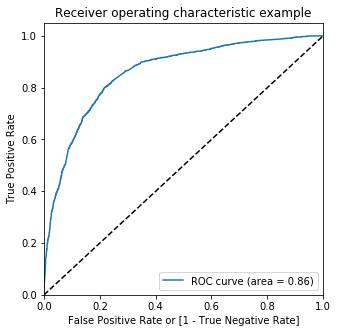

In [144]:
draw_roc(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

As we can see, the area under the ROC curve is really high - 0.86. This tells us that the test is pretty accurate

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conv,Conv_Prob,Row Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.859533,3296,1,1,1,1,1,1,1,1,1,1,0
1,0,0.174100,6487,0,1,1,0,0,0,0,0,0,0,0
2,0,0.096393,4509,0,1,0,0,0,0,0,0,0,0,0
3,0,0.774376,682,1,1,1,1,1,1,1,1,1,0,0
4,0,0.136095,3534,0,1,1,0,0,0,0,0,0,0,0


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.411417     1.000000     0.000000
0.1   0.1  0.561223     0.977011     0.270588
0.2   0.2  0.710691     0.917077     0.566428
0.3   0.3  0.770647     0.866174     0.703874
0.4   0.4  0.788718     0.776683     0.797131
0.5   0.5  0.788211     0.688834     0.857676
0.6   0.6  0.773011     0.597291     0.895839
0.7   0.7  0.744469     0.469622     0.936585
0.8   0.8  0.718798     0.371100     0.961836
0.9   0.9  0.663233     0.198686     0.987948


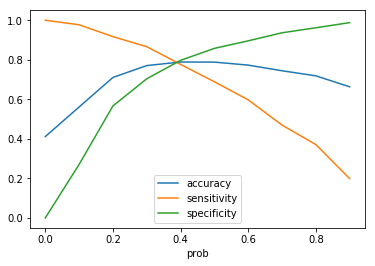

In [147]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, we can see that 0.4 is the optimum point to take it as a cutoff probability.

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Conv,Conv_Prob,Row Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.859533,3296,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.174100,6487,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.096393,4509,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.774376,682,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.136095,3534,0,1,1,0,0,0,0,0,0,0,0,0


Let's check the area under the ROC curve now, to see if we have a good enough model

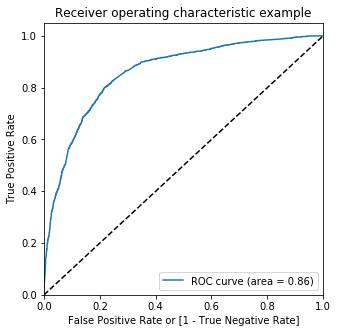

In [149]:
draw_roc(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted)

0.7887181219388617

In [151]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.final_predicted )
confusion2

array([[2778,  707],
       [ 544, 1892]], dtype=int64)

Calculating metrics other than accuracy

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity = ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('Positive Rate = ', FP/ float(TN+FP))
# Positive predictive value 
print ('Positive predictive value = ', TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value = ', TN / float(TN+ FN))

from sklearn.metrics import precision_score, recall_score
#Precision Score
print('Precision Score = ', precision_score(y_train_pred_final.Conv, y_train_pred_final.predicted))
#Recall Score
print('Recall Score = ',recall_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

Sensitivity =  0.7766830870279147
Specificity =  0.7971305595408895
Positive Rate =  0.20286944045911048
Positive predictive value =  0.727972297037322
Negative predictive value =  0.8362432269717038
Precision Score =  0.7718491260349586
Recall Score =  0.6888341543513957


### Making predictions on the test set

In [154]:
# Apply scaler() to all the columns except the 'dummy variables variables
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

C:\Users\vyom\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vyom\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,leadorigin_API,leadorigin_LandingPageSubmission,leadorigin_LeadAddForm,leadorigin_LeadImport,...,lastactivity_SMSSent,lastactivity_Unreachable,lastactivity_Unsubscribed,lastnotable_EmailBounced,lastnotable_EmailLinkClicked,lastnotable_EmailOpened,lastnotable_Modified,lastnotable_OlarkChatConv,lastnotable_PageVisitedWebsite,lastnotable_SMSSent
8093,587991,0,0.1,0.646127,0.2,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5092,611048,0,0.2,0.373680,0.4,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4032,621318,0,0.3,0.536092,0.3,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5554,607333,0,0.1,0.031690,0.2,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4639,615271,0,0.1,0.040053,0.2,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [155]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,leadorigin_API,leadorigin_LandingPageSubmission,leadsource_Facebook,leadsource_OlarkChat,leadsource_WelingakWebsite,lastactivity_Converted2Lead,lastactivity_EmailBounced,lastactivity_OlarkChatConversation,lastactivity_PageVisited,lastactivity_Unreachable,lastnotable_EmailLinkClicked,lastnotable_EmailOpened,lastnotable_Modified,lastnotable_OlarkChatConv,lastnotable_PageVisitedWebsite
8093,0,0.1,0.646127,0.2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5092,0,0.2,0.373680,0.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4032,0,0.3,0.536092,0.3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5554,0,0.1,0.031690,0.2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4639,0,0.1,0.040053,0.2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [156]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [157]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8093    0.718840
5092    0.722458
4032    0.613315
5554    0.164171
4639    0.127845
7545    0.080990
320     0.390883
7905    0.946708
2542    0.556677
6563    0.254363
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Adding Row Number to a row, which will be used as an identifier for the Lead Number
y_test_df['Row Number'] = y_test_df.index

In [160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Row Number,0
0,1,8093,0.718840
1,1,5092,0.722458
2,1,4032,0.613315
3,0,5554,0.164171
4,0,4639,0.127845


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [163]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Row Number','Converted','Conv_Prob'], axis=1)

C:\Users\vyom\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [164]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Row Number,Converted,Conv_Prob
0,8093,1,0.718840
1,5092,1,0.722458
2,4032,1,0.613315
3,5554,0,0.164171
4,4639,0,0.127845


Let's add our prediction based on the optimal probability value that was identified earlier

In [165]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [166]:
y_pred_final.head()

,Row Number,Converted,Conv_Prob,final_predicted
0,8093,1,0.718840,1
1,5092,1,0.722458,1
2,4032,1,0.613315,1
3,5554,0,0.164171,0
4,4639,0,0.127845,0


In [167]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.8

In [168]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )

TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity = ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('Positive Rate = ', FP/ float(TN+FP))
# Positive predictive value 
print ('Positive predictive value = ', TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value = ', TN / float(TN+ FN))

from sklearn.metrics import precision_score, recall_score
#Precision Score
print('Precision Score = ', precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
#Recall Score
print('Recall Score = ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Sensitivity =  0.7880928355196771
Specificity =  0.8021978021978022
Positive Rate =  0.1978021978021978
Positive predictive value =  0.718491260349586
Negative predictive value =  0.8552722260509993
Precision Score =  0.718491260349586
Recall Score =  0.7880928355196771


### Actual Probelm Statement for X Education 

We've been asked to build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In order to do this, we'll run our model on the entire dataset, and convert the probability of conversion for each lead from 0 to 1 to a scale between 0 and 100 which can be used by the company to target potential leads

In [169]:
leads_final = leads.copy(deep = True) 

In [170]:
# Apply scaler() to all the columns except the 'dummy variables variables
leads_final[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(leads_final[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
leads_final.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,leadorigin_API,leadorigin_LandingPageSubmission,leadorigin_LeadAddForm,...,lastactivity_SMSSent,lastactivity_Unreachable,lastactivity_Unsubscribed,lastnotable_EmailBounced,lastnotable_EmailLinkClicked,lastnotable_EmailOpened,lastnotable_Modified,lastnotable_OlarkChatConv,lastnotable_PageVisitedWebsite,lastnotable_SMSSent
0,660737,0,0,0.00,0.000000,0.00,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,660728,0,0,0.25,0.296655,0.25,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,660727,0,1,0.10,0.674296,0.20,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,0.05,0.134243,0.10,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,660681,0,1,0.10,0.628521,0.10,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [171]:
leads_final_x = leads_final[col]
leads_final_x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,leadorigin_API,leadorigin_LandingPageSubmission,leadsource_Facebook,leadsource_OlarkChat,leadsource_WelingakWebsite,lastactivity_Converted2Lead,lastactivity_EmailBounced,lastactivity_OlarkChatConversation,lastactivity_PageVisited,lastactivity_Unreachable,lastnotable_EmailLinkClicked,lastnotable_EmailOpened,lastnotable_Modified,lastnotable_OlarkChatConv,lastnotable_PageVisitedWebsite
0,0,0.00,0.000000,0.00,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,0,0.25,0.296655,0.25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0.10,0.674296,0.20,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0.05,0.134243,0.10,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0.10,0.628521,0.10,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [172]:
leads_final_sm = sm.add_constant(leads_final_x)

In [173]:
y_test_pred_final2 = res.predict(leads_final_sm)
y_test_pred_final2[:10]

0    0.169416
1    0.427346
2    0.702953
3    0.079680
4    0.445488
5    0.080990
6    0.719384
7    0.080990
8    0.123602
9    0.159580
dtype: float64

In [174]:
# Converting y_test to dataframe
y_test_pred_final2 = pd.DataFrame(y_test_pred_final2)

# Adding Row Number to a row, which will be used as an identifier for the Lead Number
y_test_pred_final2['Row Number'] = y_test_pred_final2.index

In [175]:
leads_final_y = leads_final['Converted']

In [176]:
# Removing index for both dataframes to append them side by side 
y_test_pred_final2.reset_index(drop=True, inplace=True)
leads_final_y.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
leads_final_pred = pd.concat([y_test_df, y_pred_1],axis=1)
leads_final_pred['Converted'] = np.array([int(x) if float(x).is_integer() else x for x in leads_final_pred['Converted']], dtype=object)
leads_final_pred['Converted'] = leads_final_pred['Converted'].astype(str).astype(int)
leads_final_pred.head()

,Converted,Row Number,0
0,1,8093,0.718840
1,1,5092,0.722458
2,1,4032,0.613315
3,0,5554,0.164171
4,0,4639,0.127845


In [178]:
# Renaming the column 
leads_final_pred= leads_final_pred.rename(columns={ 0 : 'Conv_Prob'})

In [179]:
leads_final_pred['final_predicted'] = leads_final_pred.Conv_Prob.map(lambda x: 1 if x > 0.4 else 0)

Adding Lead Score to each of the lead number between 0-100 based on conversion probability as requested in the problem statement

In [180]:
leads_final_pred['Lead Score'] = leads_final_pred['Conv_Prob']*100

In [181]:
leads_final_pred.head()

,Converted,Row Number,Conv_Prob,final_predicted,Lead Score
0,1,8093,0.718840,1,71.884005
1,1,5092,0.722458,1,72.245804
2,1,4032,0.613315,1,61.331548
3,0,5554,0.164171,0,16.417146
4,0,4639,0.127845,0,12.784463


In [182]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(leads_final_pred.Converted, leads_final_pred.final_predicted),2)

0.8

#### Therefore, the overall accuracy of our model on the entire dataset comes up to 80%

Let's now calculate how many leads that the company would need to reach out to in order to get 80% of lead conversion rate

In [183]:
# Total number of leads that are predicted to convert
leads_final_pred['final_predicted'].sum()

1087

Since we need to ensure 80% of people convert, we should target 1087/0.8 number of people who have the highest conversion probability based on our model 

In [184]:
round(1087/0.8,0)

1359.0

#### Therefore, the company should reach out to ~1360 users with the highest conversion probability out of our model to ensure that they manage to covnert 80% of those